In [5]:
from ION_GEN import ION_GEN
import networkx as nx

In [6]:

graph = {
"models" : {
    "groq_llama3_70b1":{"endpoint":"https://api.groq.com/openai/v1/chat/completions",
                        "api_key":"api_key",
                        "model":"llama3-70b-8192","temperature":0},
    "groq_llama3_8b":{"endpoint":"https://api.groq.com/openai/v1/chat/completions",
                      "api_key":"api_key",
                      "model":"llama3-8b-8192","temperature":0},
    "openai_gpt4o":{"endpoint":"https://api.groq.com/openai/v1/chat/completions",
                    "api_key":"api_key",
                    "model":"llama3-8b-8192","temperature":0}
},

"nodes" : [
    {
        "name":"nodeHuman",
        "type":"InputNode",
        "input":{},
    },{
        "name":"nodeAgent1",
        "type":"AgentNode",
        "input":{"model":"groq_llama3_8b","system":"You are a helpful assistant.","user":("nodeHuman","text")},
    },{
        "name":"hallucinationsFormatter",
        "type":"TextFormat",
        "input":{"format":"Consider the message: {user} and answer: {answer}. Is the answer are hallucinations or not? Answer me only yes or no.","user":("nodeHuman","text"),"answer":("nodeAgent1","last_response")},
    },{
        "name":"nodeAgent2",
        "type":"AgentNode",
        "input":{"model":"groq_llama3_70b1","system":"You are a ai assistant.","user":("hallucinationsFormatter","text")},
    },{
        "name":"nodeOutput",
        "type":"OutputNode",
        "input":{"text":"Answer is yes"}
    }   
],

"edges": [("nodeHuman","nodeAgent1"),("nodeAgent1","hallucinationsFormatter"),("hallucinationsFormatter","nodeAgent2"),("nodeAgent2","nodeOutput",{"condition":"no"}),("nodeAgent2","nodeHuman",{"condition":"yes"})]
}

Create node: InputNode
Create node: AgentNode
Create node: TextFormat
Create node: AgentNode
Create node: OutputNode


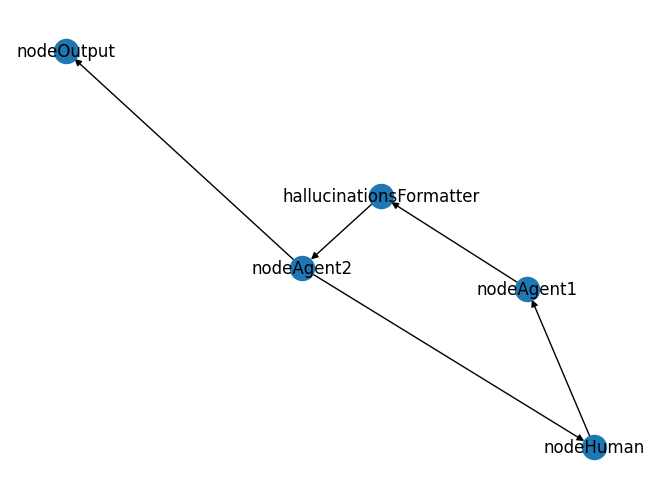

In [7]:
Gexe = ION_GEN()
Gexe.create_graph_from_data(graph)
nx.draw(Gexe.graph,with_labels=True)

In [8]:
Gexe.run()

goto node: nodeAgent1
AgentNode nodeAgent1 messages: [{'role': 'system', 'content': 'You are a helpful assistant.'}, {'role': 'user', 'content': 'สวัสดีครับ'}]
AgentNode response: สวัสดีครับ! สบายดีหรือเปล่า? (Hello! How are you?)
goto node: hallucinationsFormatter
Consider the message: สวัสดีครับ and answer: สวัสดีครับ! สบายดีหรือเปล่า? (Hello! How are you?). Is the answer are hallucinations or not? Answer me only yes or no.
goto node: nodeAgent2
AgentNode nodeAgent2 messages: [{'role': 'system', 'content': 'You are a ai assistant.'}, {'role': 'user', 'content': 'Consider the message: สวัสดีครับ and answer: สวัสดีครับ! สบายดีหรือเปล่า? (Hello! How are you?). Is the answer are hallucinations or not? Answer me only yes or no.'}]
AgentNode response: No
goto node: nodeOutput
Answer is yes
End!!
